In [1]:
import torch
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

### Load Predictions

In [2]:
datapath_py ="resources/saved/py_predicted.txt"
datapath_cpp ="resources/saved/cpp_predicted.txt"

def read_predictions(datapath):
    with open(datapath) as file_content:
        file_content = [i for i in file_content.readlines()]
    
    out=[]
    for i in file_content:
        if i == '\n':
            print("Skip Empty line")
            continue
        out_pair = list(map(float, i.split()))
        out.append(out_pair)
    
    return np.array(out)

In [3]:
py_pred = read_predictions(datapath_py)
cpp_pred = read_predictions(datapath_cpp)

Skip Empty line
Skip Empty line


### Print Predictions

In [4]:
print("Python fwd pass: ", py_pred)
print("C++ fwd pass: ", cpp_pred)

Python fwd pass:  [[5.79098511 1.68282413]
 [3.79514885 1.50127339]
 [3.05594134 2.65454769]
 [3.59553909 1.0229435 ]
 [3.67793489 0.66021532]
 [4.15732527 0.90474343]
 [4.09724522 0.99075013]
 [2.9376111  1.04406965]
 [1.8372159  2.59138894]
 [1.23373771 2.04912949]
 [3.48744416 0.73090637]
 [2.71336007 0.22554693]
 [2.82046795 0.40351319]
 [2.87005043 1.63838708]
 [0.70065492 2.67366743]
 [0.88620341 2.66380835]
 [3.32769847 0.81819201]
 [2.49346495 0.60585958]
 [0.74832189 2.84791136]
 [2.2085979  1.51993418]
 [0.7664963  2.69486427]
 [2.67619324 0.70304364]
 [0.80111802 2.66594386]
 [1.17281389 3.57055759]
 [1.21135879 2.25158095]
 [1.03086376 2.40085602]
 [0.37634149 3.37193155]
 [1.39961958 2.71279001]
 [1.21885276 2.28670406]
 [0.65545332 3.94429827]
 [1.43623936 2.53711128]
 [1.88981557 3.04195762]
 [1.25789416 5.09653568]
 [1.65704513 5.76212788]]
C++ fwd pass:  [[5.790986 1.682824]
 [3.795149 1.501273]
 [3.055941 2.654548]
 [3.595539 1.022943]
 [3.677935 0.660215]
 [4.157325 

### Scatter Plots

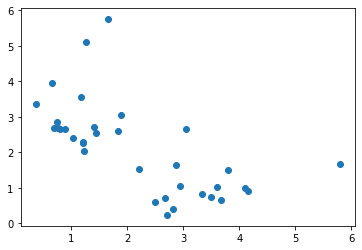

In [5]:
plt.scatter(py_pred[:,0], py_pred[:,1])

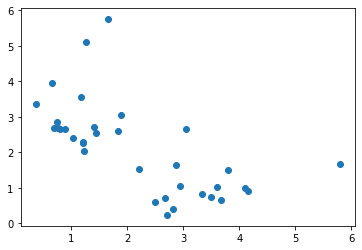

In [6]:
plt.scatter(cpp_pred[:,0], cpp_pred[:,1])

### Error

In [7]:
err_arr = py_pred-cpp_pred

In [8]:
err_arr

array([[-8.92578125e-07,  1.34826660e-07],
       [-1.50512695e-07,  3.93630981e-07],
       [ 3.43307495e-07, -3.08654785e-07],
       [ 9.30175781e-08,  4.96704102e-07],
       [-1.14974976e-07,  3.18202972e-07],
       [ 2.67791748e-07, -5.67001343e-07],
       [ 2.16369629e-07,  1.33991241e-07],
       [-8.96942139e-07, -3.52210999e-07],
       [-9.95788574e-08, -5.91888427e-08],
       [-2.92861938e-07, -5.13916016e-07],
       [ 1.62368774e-07,  3.67301941e-07],
       [ 7.11822508e-08, -7.37400055e-08],
       [-5.10864258e-08,  1.93130493e-07],
       [ 4.30297852e-07,  8.40072631e-08],
       [-7.60841370e-08,  4.30877686e-07],
       [ 4.08241272e-07, -6.54205322e-07],
       [-5.30838013e-07,  5.15747067e-09],
       [-5.32531739e-08, -4.22344208e-07],
       [-1.09169006e-07,  3.57879639e-07],
       [-1.01516723e-07,  1.77398682e-07],
       [ 3.00697327e-07,  2.73071289e-07],
       [ 2.37304687e-07, -3.60340118e-07],
       [ 1.62429810e-08, -1.38992310e-07],
       [-1.

### Norm

In [9]:
py_pred_norm = np.linalg.norm(py_pred)
cpp_pred_norm = np.linalg.norm(cpp_pred)

print("Norms for python predictions and c++ predictions:", py_pred_norm, cpp_pred_norm)

Norms for python predictions and c++ predictions: 20.656949141902103 20.65694939092029


### np.allclose()

In [10]:
# True if two arrays are element-wise equal within a tolerance.
np.allclose(py_pred, cpp_pred) # default rtol=1e-05 

True